In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
pd.options.display.max_columns = None
import joblib
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc,roc_auc_score,  classification_report, matthews_corrcoef
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [3]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

print(f"initial: {initial}")
print(f"remaining: {remaining}")
print(f"dropped: {dropped}")

initial: 862
remaining: 213
dropped: 649


In [4]:
impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

In [5]:
print(df.shape[0])

29673


In [6]:
conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

In [7]:
print(df.shape[0])

18886


In [8]:
print(df['TIME'], df['OUTCOME_WITHIN_4_YEARS'].describe())

3         1
9         1
11        1
14        1
18        1
         ..
29666     5
29667     4
29668     2
29669    10
29671     6
Name: TIME, Length: 18886, dtype: int64 count    18886.000000
mean         0.307212
std          0.461350
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: OUTCOME_WITHIN_4_YEARS, dtype: float64


In [9]:
df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

In [61]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)


logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LogisticRegression(max_iter=200))
])

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)
print("Logistic Regression Best Parameters:", grid_search_lr.best_params_)
print("Best roc_auc score:", grid_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Bakalarka\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "C:\Bakalarka\venv\lib\site-packages\sklear

Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best roc_auc score: 0.9215705040265313


In [72]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)


svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', SVC(probability=True))
])

param_grid_svm = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'classifier__gamma': ['scale', 'auto']  
}

grid_search_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)
print("SVM Best Parameters:", grid_search_svm.best_params_)
print("Best roc_auc score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Bakalarka\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "C:\Bakalarka\venv\lib\site-packages\sklea

SVM Best Parameters: {'classifier__C': 100, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'}
Best roc_auc score: 0.9139898808068395


In [12]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', RandomForestClassifier(random_state=22)),
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10,20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=2
)

grid_search_rf.fit(X_train, y_train)
print("RF Best Parameters:", grid_search_rf.best_params_)
print("Best roc_auc score:", grid_search_rf.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
RF Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best roc_auc score: 0.9234471197517643


In [59]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LogisticRegression(max_iter=200, C=1, penalty='l2', solver='liblinear'))
])

full_pipeline.fit(X_train, y_train)

train_score = full_pipeline.score(X_train, y_train)
test_predictions = full_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

train_score, test_accuracy

(0.8534551231135822, 0.8562731604023293)

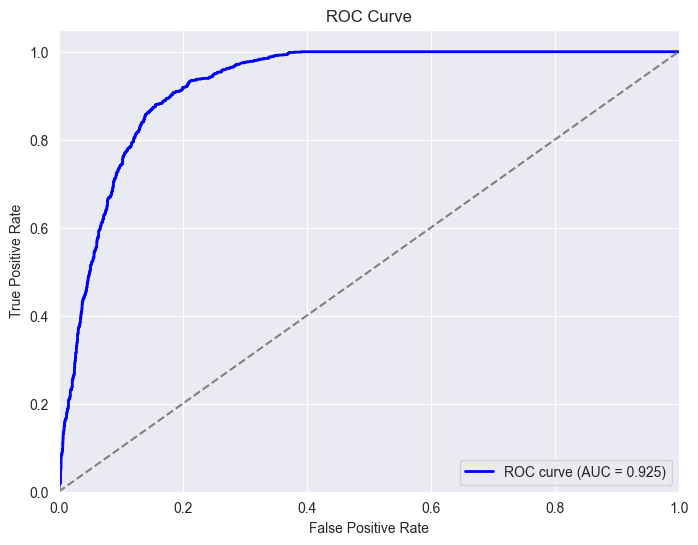

ROC AUC Score: 0.9247728105551034
Matthews Correlation Coefficient: 0.6797012895959539
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      2591
         1.0       0.74      0.83      0.78      1187

    accuracy                           0.86      3778
   macro avg       0.83      0.85      0.84      3778
weighted avg       0.86      0.86      0.86      3778


In [60]:
y_prob = full_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

y_pred = full_pipeline.predict(X_test)
class_report = classification_report(y_test, y_pred)

mcc = matthews_corrcoef(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", class_report)
